# An application: approximating integrals with norms and Monte Carlo integration

To illustrate another way to think about norms, let's consider the problem of approximating integrals numerically.
For example, suppose we wanted to compute the integral $\int_{0}^1 x dx$.
The idea is to discretize the region of integration $[0,1]$ using an $n$-dimensional vector $\boldsymbol{x}$, for example as $\boldsymbol{x} = (0/n, 1/n, 2/n,\dots, 1)$.
The difference between each entry in this vector is approximately $dx \approx 1/n$, and so we can approximate this integral as $\int_{0}^1 x dx \approx \frac{1}{n}\sum_{i=1}^n |x_i| = \frac{1}{n}\|\boldsymbol{x}\|_1$.
The true value of the integral $\int_{0}^1 x dx$ is just $1/2$, so let's see how good the approximation using the $1$-norm is as we make $n$ bigger.

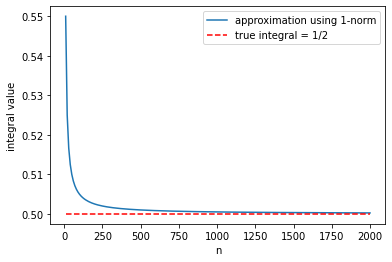

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


approximations = []

n_range = np.arange(10, 2010, 10)

for n in n_range:
    x = np.array([i/n for i in range(n+1)])
    integral = (1./n)*np.linalg.norm(x, ord=1)
    approximations.append(integral)

plt.plot(n_range, approximations, label='approximation using 1-norm')
plt.hlines(1./2, 10, 2000, label='true integral = 1/2', color='red', linestyle='--')
plt.xlabel('n')
plt.ylabel('integral value')
plt.legend()
plt.show()

As we see, this as $n$ gets large, the $1$-norm approximation becomes very close to the true integral.

More generally, we can do this approximation with integrals of the form $\int_{a}^{b} f(x) dx$ where $f(x)\geq 0$ on $[a,b]$. Then we can approximate the integral as follows:

- First, discretize the interval $[a,b]$ with the vector $\boldsymbol{x}=(x_1,\dots,x_n, x_{n+1})$ whose $i$th entry is $x_i = a + \frac{(i-1)(b-a)}{n}$
- Compute the vector $\boldsymbol{y}$ whose $i$th entry is $y_i = f(x_i)$
- The integral is approximately $\frac{(b-a)}{n}\|\boldsymbol{y}\|_1$

For example, let's consider the integral $\int_{1}^3 \frac{1}{x}dx$.  The true value of this integral is $\log(3)$, but let's try and approximate it using the $1$-norm approach.

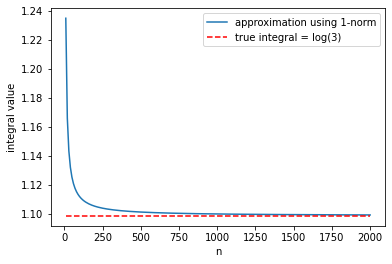

In [2]:
def f(x):
    return 1./x

n_max = 2000
n_range = np.arange(10, n_max + 10, 10)

a = 1
b = 3

approximations = []

for n in n_range:
    x = np.array([a+i*(b-a)/n for i in range(n+1)])
    y = f(x)
    integral = ((b-a)/n)*np.linalg.norm(y, ord=1)
    approximations.append(integral)

plt.plot(n_range, approximations, label='approximation using 1-norm')
plt.hlines(np.log(3), 10, n_max, label='true integral = log(3)', color='red', linestyle='--')
plt.xlabel('n')
plt.ylabel('integral value')
plt.legend()
plt.show()

Again, we see that this approximation works quite well as $n$ gets reasonably large. By changing the function $f$ and using different intervals $[a,b]$, we can compute many integrals in this way.

This idea is closely related to _Monte Carlo integration_. In Monte Carlo integration, rather than defining the vector $\boldsymbol{x}$ to be a grid over $[a,b]$, we can sample $x_1,\dots,x_n \sim \text{Uniform}[a,b]$ and estimate the integral as:

$$
\int_{a}^b f(x)dx \approx \frac{b-a}{n}\sum_{i=1}^n f(x_i).
$$

This works because of the _law of large numbers_, which states that $\frac{1}{n}\sum_{i=1}^n f(x_i) \xrightarrow{n\to\infty} \mathbb{E}_{X\sim \text{Unif}[a,b]}[f(X)]$. Let's see the example of $f(x) = 1/x$ again.

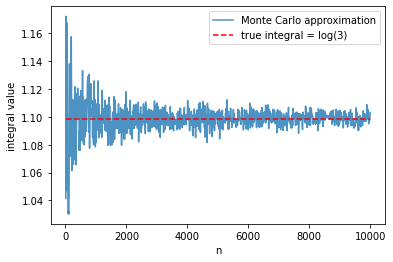

In [3]:
def f(x):
    return 1./x

n_max = 10000
n_range = np.arange(10, n_max + 10, 10)

a = 1
b = 3

approximations = []

for n in n_range:
    x = np.random.uniform(low=a, high=b, size=n)
    y = f(x)
    integral = ((b-a)/n)*np.linalg.norm(y, ord=1)
    approximations.append(integral)

plt.plot(n_range, approximations, label='Monte Carlo approximation', alpha=.8)
plt.hlines(np.log(3), 10, n_max, label='true integral = log(3)', color='red', linestyle='--')
plt.xlabel('n')
plt.ylabel('integral value')
plt.legend()
plt.show()